In [1]:
import os
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

2025-04-10 21:25:53.873617: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-10 21:25:57.044288: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


scanpy==1.10.4 anndata==0.11.3 umap==0.5.6 numpy==1.26.4 scipy==1.13.0 pandas==2.2.3 scikit-learn==1.4.2 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.12


In [2]:
ROOT_DIR = '/work/hdd/bbjr/mallina1/data/human_cellariumgpt_v2/assay_conversion'

# INP_DIR = max((d for d in os.listdir(ROOT_DIR) if os.path.isdir(os.path.join(ROOT_DIR, d))), key=lambda x: os.path.getctime(os.path.join(ROOT_DIR, x)))
# print(INP_DIR)

# INP_DIR = '2025_04_03_17_40_convert_to_10x_Chromium_v2_A_ngenes4096_counts500_umis500_20000'
# INP_DIR = '2025_04_03_17_37_convert_to_10x_Chromium_v2_A_ngenes4096_counts2001_umis500_20000'
INP_DIR = '2025_04_10_20_51_convert_to_10x_Chromium_v2_A_ngenes4096_counts2001_umis500_10000_remove_ig_False'

# original input assays
original_methods = ['10x Chromium (v2) A', '10x Chromium (v2) B', '10x Chromium (v3)',
                    'Drop-seq', 'Seq-Well', 'inDrops']
# original_methods = ['inDrops', '10x Chromium (v3)', 'Seq-Well', '10x Chromium (v2) A', 
#                     'Drop-seq', '10x Chromium (v2) B']

# target_assay = '10x Chromium (v3)'
target_assay = original_methods[0]

In [3]:
original_adata = sc.read_h5ad(os.path.join(ROOT_DIR, INP_DIR, 'original.h5ad'))
converted_adata = sc.read_h5ad(os.path.join(ROOT_DIR, INP_DIR, 'converted.h5ad'))
converted_means_adata = sc.read_h5ad(os.path.join(ROOT_DIR, INP_DIR, 'converted_means.h5ad'))

# original_adata = original_adata[original_adata.obs.Experiment == 'pbmc1']
# converted_adata = converted_adata[converted_adata.obs.Experiment == 'pbmc1']
# converted_means_adata = converted_means_adata[converted_means_adata.obs.Experiment == 'pbmc1']

In [4]:
print(pd.crosstab(original_adata.obs.Method, original_adata.obs.CellType))
print()
print(pd.crosstab(original_adata.obs.Method, original_adata.obs.Experiment))

CellType             B cell  Cytotoxic T cell
Method                                       
10x Chromium (v2) A     288              1174
10x Chromium (v2) B     388               954
10x Chromium (v3)       346               962
Drop-seq               1405              1978
Seq-Well                527              1278
inDrops                1045              1664

Experiment           pbmc1  pbmc2
Method                           
10x Chromium (v2) A   1462      0
10x Chromium (v2) B   1342      0
10x Chromium (v3)     1308      0
Drop-seq              1666   1717
Seq-Well              1508    297
inDrops               1482   1227


In [5]:
cell_type = 'B cell'
# cell_type = 'Cytotoxic T cell'
ct_original = original_adata[original_adata.obs.CellType == cell_type]
ct_converted = converted_adata[converted_adata.obs.CellType == cell_type]
ct_converted_means = converted_means_adata[converted_means_adata.obs.CellType == cell_type]

# ct_original = ct_original[ct_original.obs.Method == '10x Chromium (v2) A']
# ct_converted_means = ct_converted_means[ct_converted_means.obs.Method == 'Drop-seq']

In [6]:
pbmc_umis = ct_original[ct_original.obs.Method == '10x Chromium (v2) A'].obs.nUMI.astype(int)
median_umi = np.median(np.array(pbmc_umis).squeeze())

median_umi

2359.5

### sandbox stuff

In [7]:
# plt.hist(np.array(converted_means_adata.X.sum(1)).astype(int).squeeze(), range=(0, 5000), bins=200)
# plt.show()

In [8]:
# plt.scatter(np.array(original_adata.obs.nUMI.to_numpy()).astype(int).squeeze(), np.array(original_adata.X.sum(1)).astype(int).squeeze())
# plt.show()

In [9]:
# ct_original.X / ct_original.obs.nUMI.astype(int).to_numpy()[:, None]
# test = ct_original[ct_original.obs.Method == assay].X / ct_original[ct_original.obs.Method == assay].obs.nUMI.astype(int).to_numpy()[:, None]
# test.todense()

In [10]:
ct_converted_means

View of AnnData object with n_obs × n_vars = 3999 × 4096
    obs: 'NAME', 'nGene', 'nUMI', 'percent.mito', 'Cluster', 'CellType', 'Experiment', 'Method', 'assay', 'assay_ontology_term_id', 'suspension_type', 'total_mrna_umis'
    var: 'gene_symbols', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'CellType_colors', 'Method_colors', 'hvg'
    obsm: 'X_harmony'

In [11]:
# ct_original.X
# np.log1p(ct_original.X.sum(0)) > 6

In [12]:
# ct_original.obs.total_mrna_umis.value_counts()

In [13]:
# plt.hist(np.log1p(np.array(ct_converted_means.X.sum(1)).squeeze()), bins=200)
# plt.show()

In [14]:
# plt.hist(np.log1p(np.array(ct_original.X.sum(1)).squeeze()), bins=200)
# plt.show()

### plots

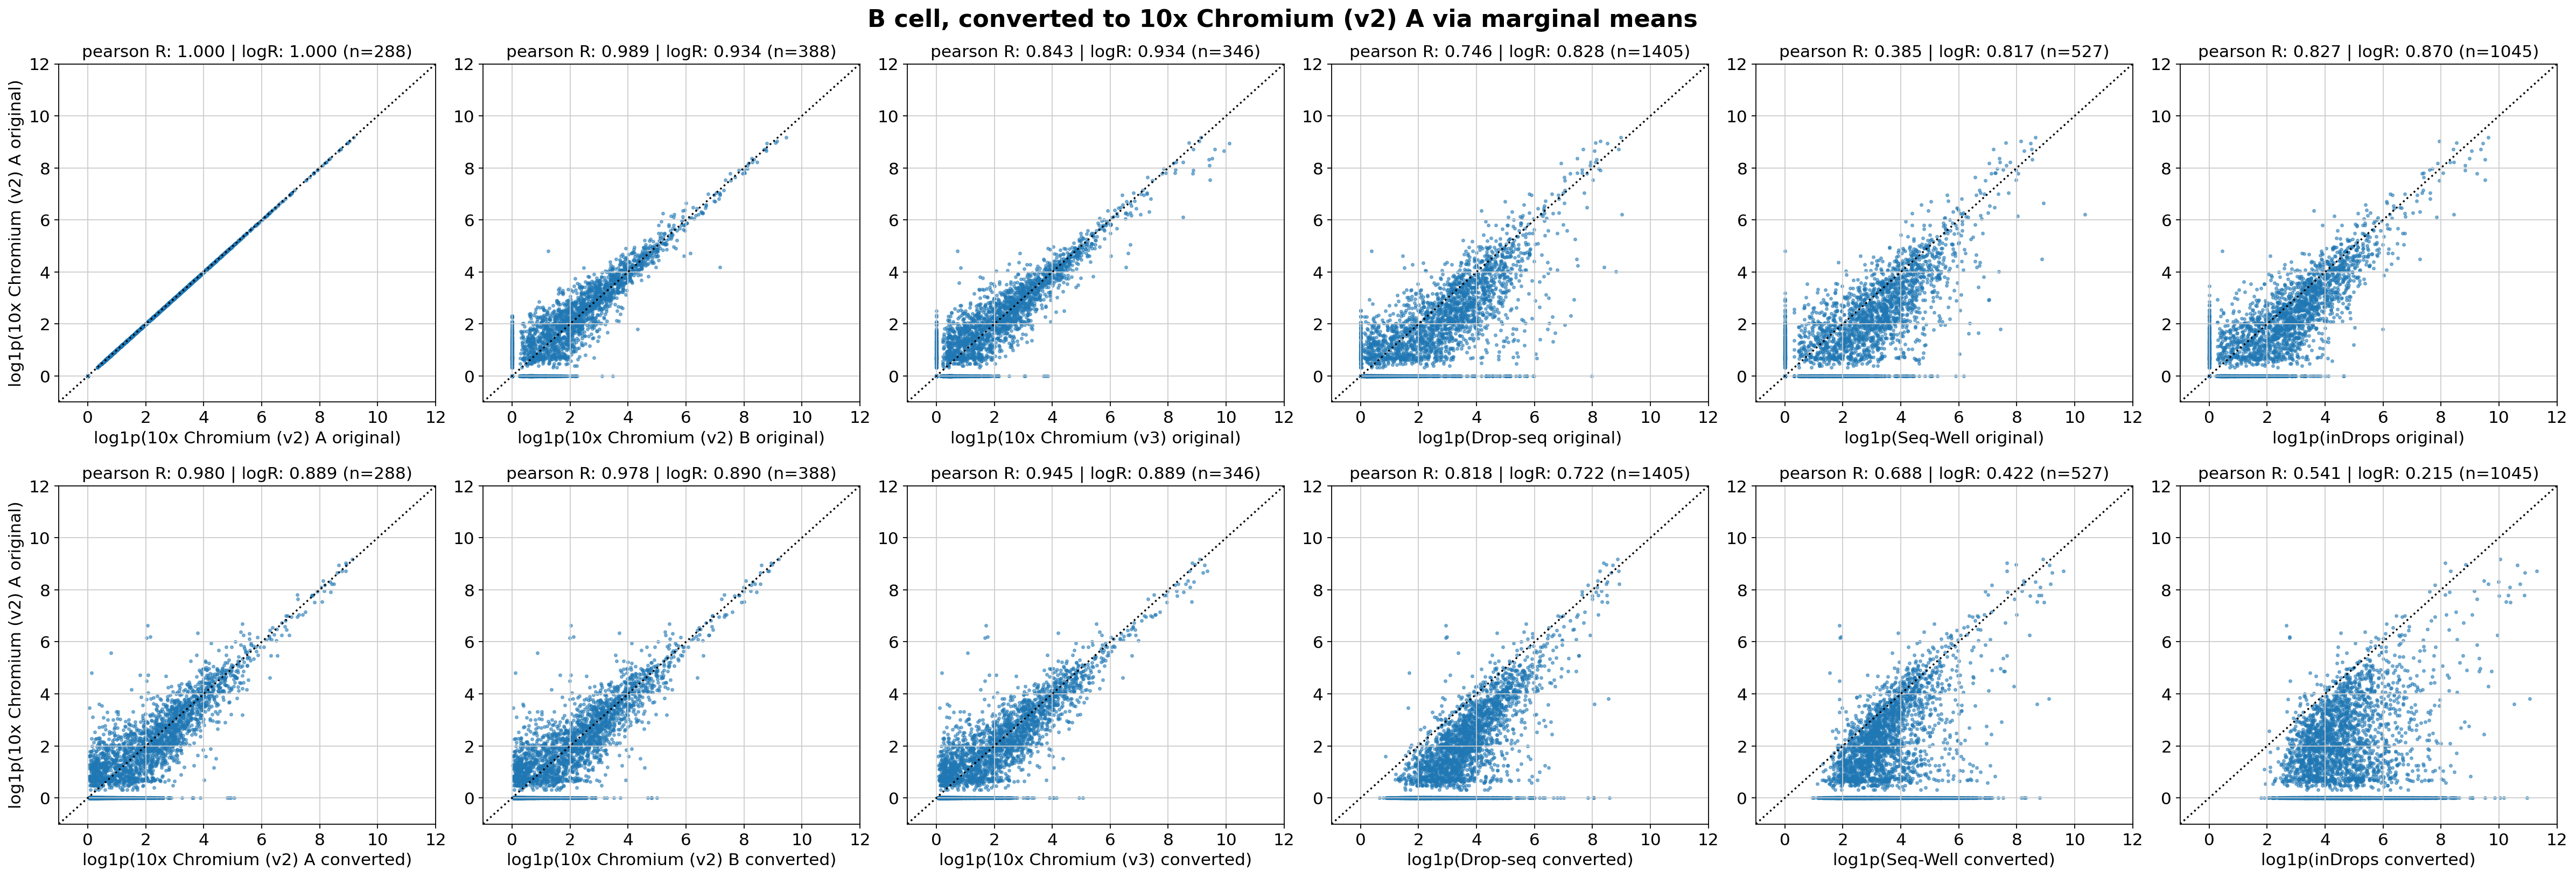

In [15]:
# Select cell type
ct_original = original_adata[original_adata.obs.CellType == cell_type]
ct_converted = converted_adata[converted_adata.obs.CellType == cell_type]
ct_converted_means = converted_means_adata[converted_means_adata.obs.CellType == cell_type]

# mask = np.log1p(ct_original.X) > 6

# Include target assay in the comparison
assays_to_compare = original_methods  # Now includes `target_assay`

# Prepare plot grid
num_assays = len(assays_to_compare)
fig, axes = plt.subplots(2, num_assays, figsize=(5 * num_assays, 10))

for idx, assay in enumerate(assays_to_compare):
    cell_count = (ct_original.obs.Method == assay).sum()

    a1_X_g = ct_original[ct_original.obs.Method == assay].X / ct_original[ct_original.obs.Method == assay].obs.nUMI.astype(int).to_numpy()[:, None]
    a2_X_g = ct_original[ct_original.obs.Method == target_assay].X / ct_original[ct_original.obs.Method == target_assay].obs.nUMI.astype(int).to_numpy()[:, None]
    a3_X_g = ct_converted_means[ct_converted_means.obs.Method == assay].X / median_umi

    a1_X_g = np.array(a1_X_g.todense().mean(0)).squeeze()
    a2_X_g = np.array(a2_X_g.todense().mean(0)).squeeze()
    a3_X_g = np.array(a3_X_g.todense().mean(0)).squeeze()

    a1_X_g = a1_X_g * 1e6  # Normalize to TPM
    a2_X_g = a2_X_g * 1e6
    a3_X_g = a3_X_g * 1e6

    # # Extract and normalize counts
    # a1_X_g = np.array(ct_original[ct_original.obs.Method == assay].X.sum(0)).squeeze()
    # a2_X_g = np.array(ct_original[ct_original.obs.Method == target_assay].X.sum(0)).squeeze()
    # a3_X_g = np.array(ct_converted_means[ct_converted_means.obs.Method == assay].X.sum(0)).squeeze()

    # a1_X_g = a1_X_g / np.sum(a1_X_g) * 1e4  # Normalize to TPM
    # a2_X_g = a2_X_g / np.sum(a2_X_g) * 1e4
    # a3_X_g = a3_X_g / np.sum(a3_X_g) * 1e4

    # Apply log1p transformation
    log_a1_X_g = np.log1p(a1_X_g)
    log_a2_X_g = np.log1p(a2_X_g)
    log_a3_X_g = np.log1p(a3_X_g)

    # TODO:
    # highly-variable, highly-expressed, concat highly-variable across assay + cell type
    # query umis at mean / mode

    # mask = log_a1_X_g > 6

    # a1_X_g = a1_X_g[mask]
    # a2_X_g = a2_X_g[mask]
    # a3_X_g = a3_X_g[mask]
    # log_a1_X_g = log_a1_X_g[mask]
    # log_a2_X_g = log_a2_X_g[mask]
    # log_a3_X_g = log_a3_X_g[mask]    

    # Compute Pearson correlations
    r_linear_orig = pearsonr(a1_X_g, a2_X_g).statistic
    r_log_orig = pearsonr(log_a1_X_g, log_a2_X_g).statistic
    
    r_linear_conv = pearsonr(a3_X_g, a2_X_g).statistic
    r_log_conv = pearsonr(log_a3_X_g, log_a2_X_g).statistic

    # Top row: Original assay vs. Target assay (Original) in log space
    ax = axes[0, idx]
    ax.scatter(log_a1_X_g, log_a2_X_g, alpha=0.5, s=5)
    ax.set_title(f"pearson R: {r_linear_orig:.3f} | logR: {r_log_orig:.3f} (n={cell_count})")
    ax.set_xlabel(f"log1p({assay} original)")
    ax.axline((0, 0), slope=1, linestyle=':', c='black')
    if idx == 0:
        ax.set_ylabel(f"log1p({target_assay} original)")

    # Bottom row: Converted assay vs. Target assay (Original) in log space
    ax = axes[1, idx]
    ax.scatter(log_a3_X_g, log_a2_X_g, alpha=0.5, s=5)
    ax.set_title(f"pearson R: {r_linear_conv:.3f} | logR: {r_log_conv:.3f} (n={cell_count})")
    ax.set_xlabel(f"log1p({assay} converted)")
    ax.axline((0, 0), slope=1, linestyle=':', c='black')
    if idx == 0:
        ax.set_ylabel(f"log1p({target_assay} original)")


# Set the same limits and ticks for all subplots
for ax in axes.flat:
    ax.set_xlim(-1, 12)
    ax.set_ylim(-1, 12)
    # ax.set_xticks(x_ticks)
    # ax.set_yticks(y_ticks)

plt.tight_layout()
plt.suptitle(f"{cell_type}, converted to {target_assay} via marginal means", fontsize=20, fontweight='bold', y=1.02)

plt.show()

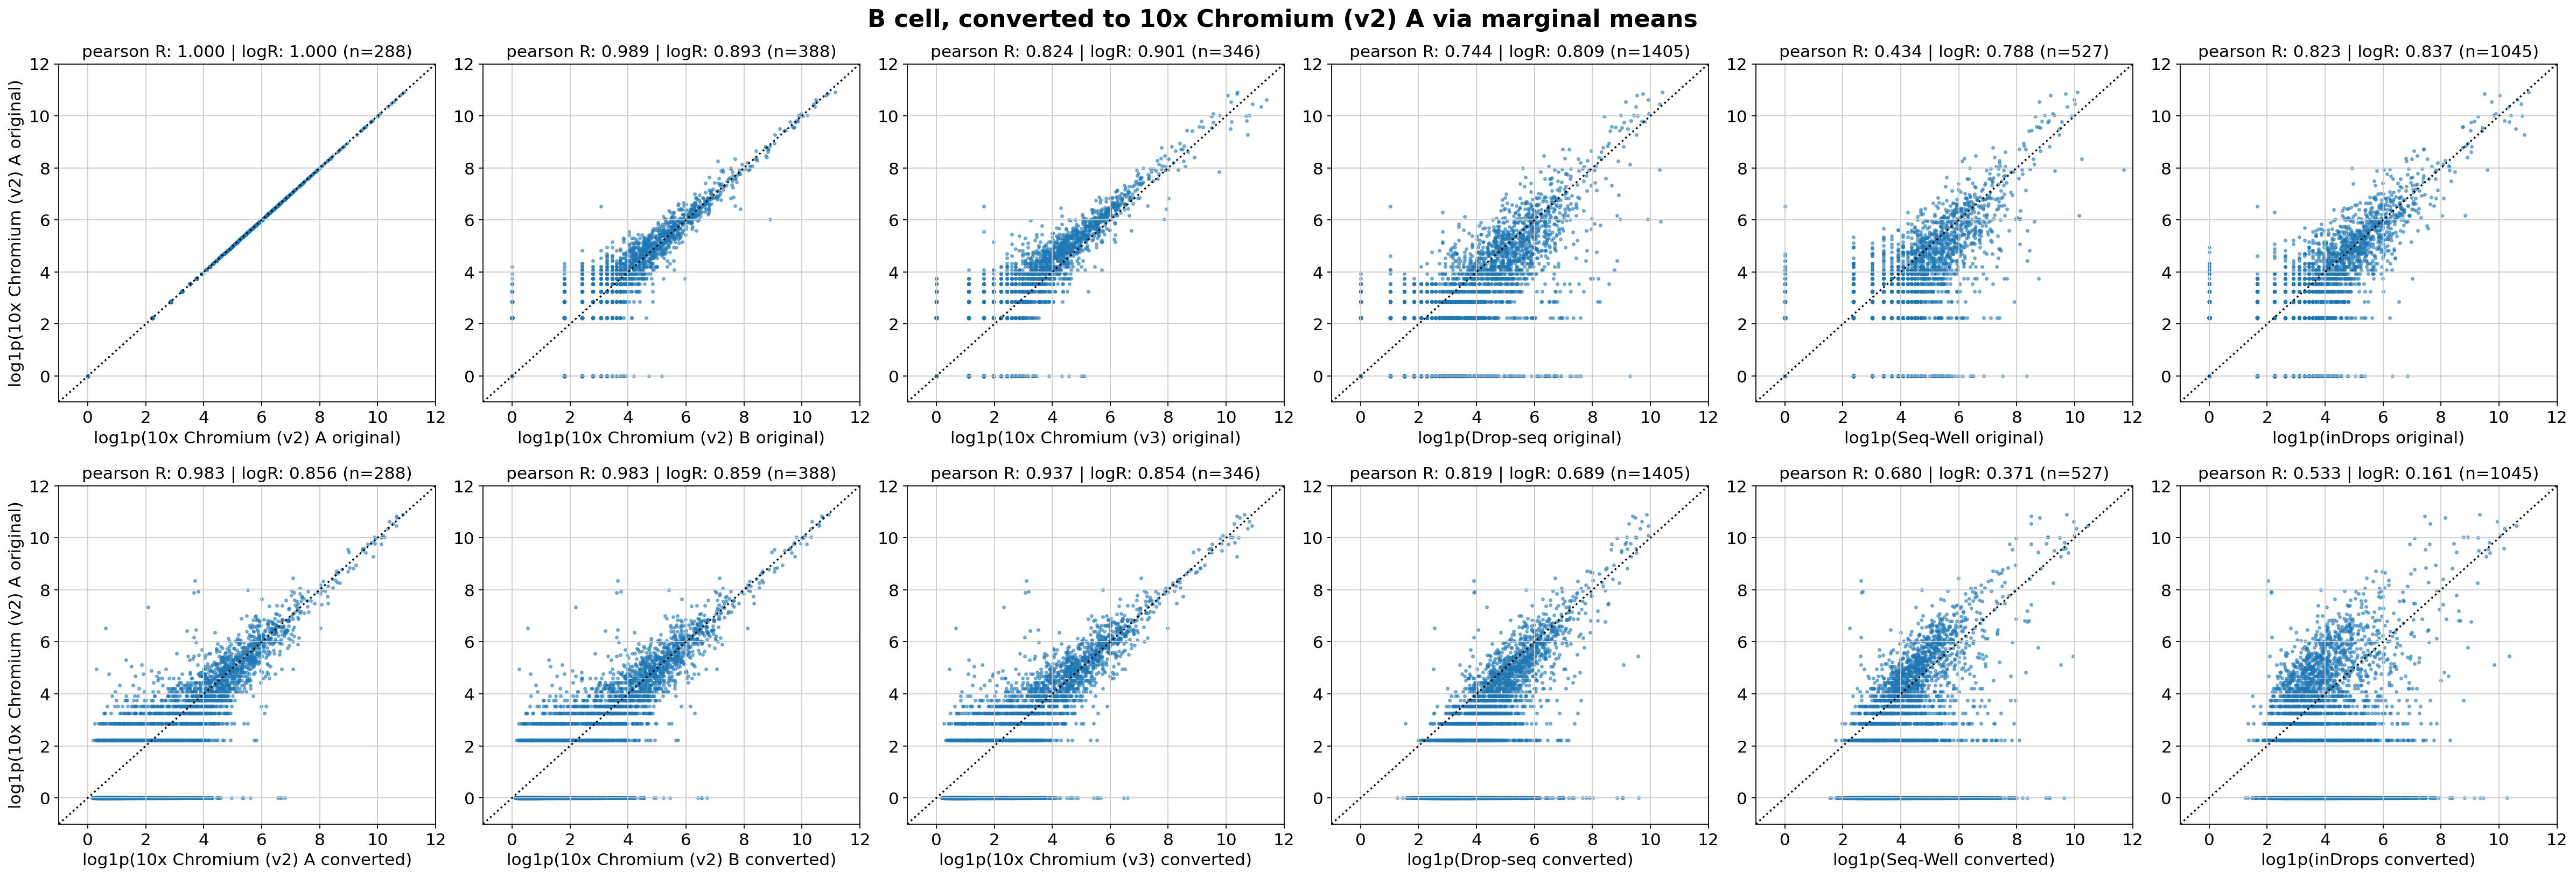

In [16]:
# Select cell type
ct_original = original_adata[original_adata.obs.CellType == cell_type]
ct_converted = converted_adata[converted_adata.obs.CellType == cell_type]
ct_converted_means = converted_means_adata[converted_means_adata.obs.CellType == cell_type]

# mask = np.log1p(ct_original.X) > 6

# Include target assay in the comparison
assays_to_compare = original_methods  # Now includes `target_assay`

# Prepare plot grid
num_assays = len(assays_to_compare)
fig, axes = plt.subplots(2, num_assays, figsize=(5 * num_assays, 10))

for idx, assay in enumerate(assays_to_compare):
    cell_count = (ct_original.obs.Method == assay).sum()

    # # Extract and normalize counts
    a1_X_g = np.array(ct_original[ct_original.obs.Method == assay].X.sum(0)).squeeze()
    a2_X_g = np.array(ct_original[ct_original.obs.Method == target_assay].X.sum(0)).squeeze()
    a3_X_g = np.array(ct_converted_means[ct_converted_means.obs.Method == assay].X.sum(0)).squeeze()

    a1_X_g = a1_X_g / np.sum(a1_X_g) * 1e6  # Normalize to TPM
    a2_X_g = a2_X_g / np.sum(a2_X_g) * 1e6
    a3_X_g = a3_X_g / np.sum(a3_X_g) * 1e6

    # Apply log1p transformation
    log_a1_X_g = np.log1p(a1_X_g)
    log_a2_X_g = np.log1p(a2_X_g)
    log_a3_X_g = np.log1p(a3_X_g)

    # TODO:
    # highly-variable, highly-expressed, concat highly-variable across assay + cell type
    # query umis at mean / mode

    # mask = log_a1_X_g > 6

    # a1_X_g = a1_X_g[mask]
    # a2_X_g = a2_X_g[mask]
    # a3_X_g = a3_X_g[mask]
    # log_a1_X_g = log_a1_X_g[mask]
    # log_a2_X_g = log_a2_X_g[mask]
    # log_a3_X_g = log_a3_X_g[mask]    

    # Compute Pearson correlations
    r_linear_orig = pearsonr(a1_X_g, a2_X_g).statistic
    r_log_orig = pearsonr(log_a1_X_g, log_a2_X_g).statistic
    
    r_linear_conv = pearsonr(a3_X_g, a2_X_g).statistic
    r_log_conv = pearsonr(log_a3_X_g, log_a2_X_g).statistic

    # Top row: Original assay vs. Target assay (Original) in log space
    ax = axes[0, idx]
    ax.scatter(log_a1_X_g, log_a2_X_g, alpha=0.5, s=5)
    ax.set_title(f"pearson R: {r_linear_orig:.3f} | logR: {r_log_orig:.3f} (n={cell_count})")
    ax.set_xlabel(f"log1p({assay} original)")
    ax.axline((0, 0), slope=1, linestyle=':', c='black')
    if idx == 0:
        ax.set_ylabel(f"log1p({target_assay} original)")

    # Bottom row: Converted assay vs. Target assay (Original) in log space
    ax = axes[1, idx]
    ax.scatter(log_a3_X_g, log_a2_X_g, alpha=0.5, s=5)
    ax.set_title(f"pearson R: {r_linear_conv:.3f} | logR: {r_log_conv:.3f} (n={cell_count})")
    ax.set_xlabel(f"log1p({assay} converted)")
    ax.axline((0, 0), slope=1, linestyle=':', c='black')
    if idx == 0:
        ax.set_ylabel(f"log1p({target_assay} original)")


# Set the same limits and ticks for all subplots
for ax in axes.flat:
    ax.set_xlim(-1, 12)
    ax.set_ylim(-1, 12)
    # ax.set_xticks(x_ticks)
    # ax.set_yticks(y_ticks)

plt.tight_layout()
plt.suptitle(f"{cell_type}, converted to {target_assay} via marginal means", fontsize=20, fontweight='bold', y=1.02)

plt.show()

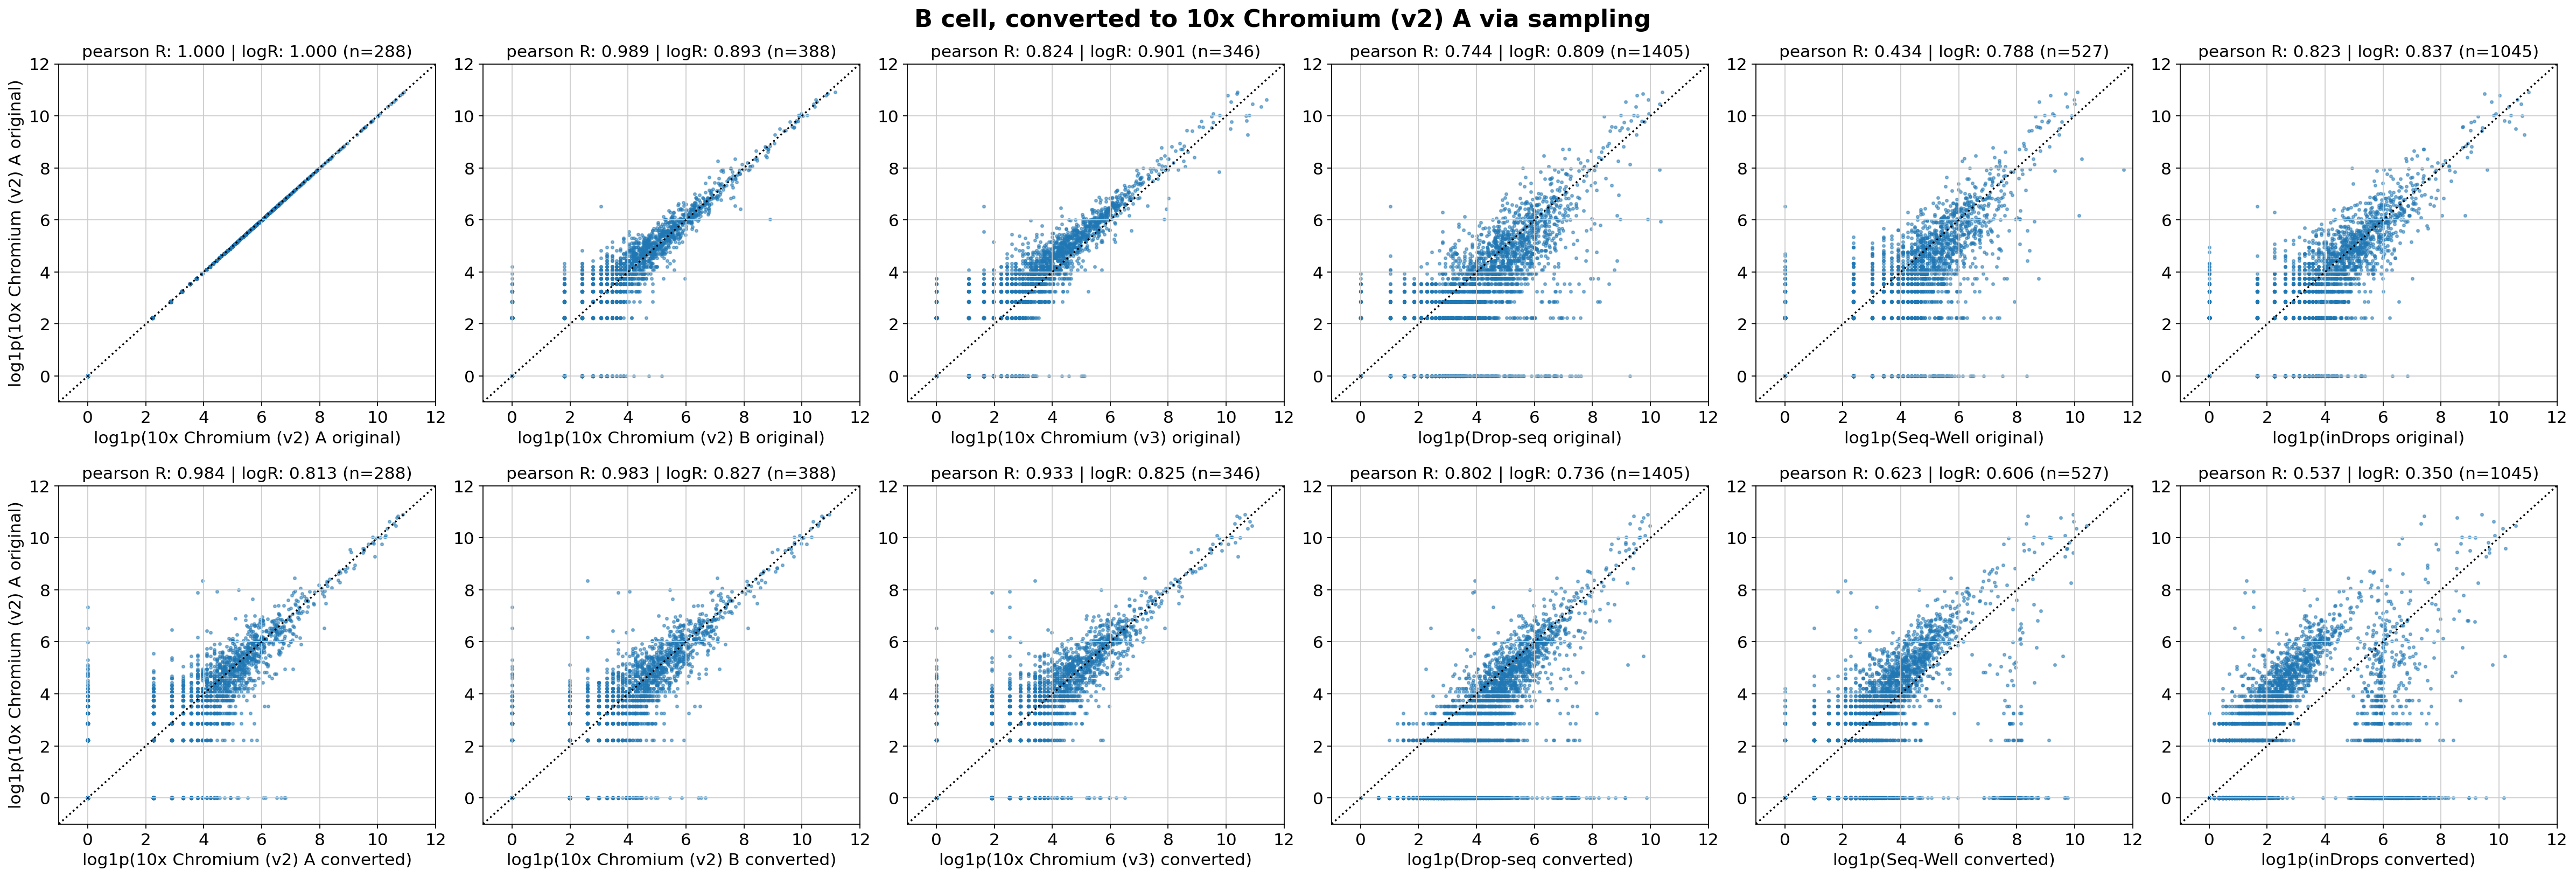

In [17]:
# Select cell type
ct_original = original_adata[original_adata.obs.CellType == cell_type]
ct_converted = converted_adata[converted_adata.obs.CellType == cell_type]
ct_converted_means = converted_means_adata[converted_means_adata.obs.CellType == cell_type]

# Include target assay in the comparison
assays_to_compare = original_methods  # Now includes `target_assay`

# Prepare plot grid
num_assays = len(assays_to_compare)
fig, axes = plt.subplots(2, num_assays, figsize=(5 * num_assays, 10))

for idx, assay in enumerate(assays_to_compare):
    cell_count = (ct_original.obs.Method == assay).sum()

    # Extract and normalize counts
    a1_X_g = np.array(ct_original[ct_original.obs.Method == assay].X.sum(0)).squeeze()
    a2_X_g = np.array(ct_original[ct_original.obs.Method == target_assay].X.sum(0)).squeeze()
    a3_X_g = np.array(ct_converted[ct_converted.obs.Method == assay].X.sum(0)).squeeze()

    a1_X_g = a1_X_g / np.sum(a1_X_g) * 1e6  # Normalize to TPM
    a2_X_g = a2_X_g / np.sum(a2_X_g) * 1e6
    a3_X_g = a3_X_g / np.sum(a3_X_g) * 1e6

    # Apply log1p transformation
    log_a1_X_g = np.log1p(a1_X_g)
    log_a2_X_g = np.log1p(a2_X_g)
    log_a3_X_g = np.log1p(a3_X_g)

    # Compute Pearson correlations
    r_linear_orig, _ = pearsonr(a1_X_g, a2_X_g)
    r_log_orig, _ = pearsonr(log_a1_X_g, log_a2_X_g)
    
    r_linear_conv, _ = pearsonr(a3_X_g, a2_X_g)
    r_log_conv, _ = pearsonr(log_a3_X_g, log_a2_X_g)

    # Top row: Original assay vs. Target assay (Original) in log space
    ax = axes[0, idx]
    ax.scatter(log_a1_X_g, log_a2_X_g, alpha=0.5, s=5)
    ax.set_title(f"pearson R: {r_linear_orig:.3f} | logR: {r_log_orig:.3f} (n={cell_count})")
    ax.set_xlabel(f"log1p({assay} original)")
    ax.axline((0, 0), slope=1, linestyle=':', c='black')
    if idx == 0:
        ax.set_ylabel(f"log1p({target_assay} original)")

    # Bottom row: Converted assay vs. Target assay (Original) in log space
    ax = axes[1, idx]
    ax.scatter(log_a3_X_g, log_a2_X_g, alpha=0.5, s=5)
    ax.set_title(f"pearson R: {r_linear_conv:.3f} | logR: {r_log_conv:.3f} (n={cell_count})")
    ax.set_xlabel(f"log1p({assay} converted)")
    ax.axline((0, 0), slope=1, linestyle=':', c='black')
    if idx == 0:
        ax.set_ylabel(f"log1p({target_assay} original)")

for ax in axes.flat:
    ax.set_xlim(-1, 12)
    ax.set_ylim(-1, 12)

plt.tight_layout()
plt.suptitle(f"{cell_type}, converted to {target_assay} via sampling", fontsize=20, fontweight='bold', y=1.02)

plt.show()

In [18]:
test = np.array(original_adata.X.max(0).todense()).squeeze()

np.unique(test, return_counts=True)

(array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
        6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
        1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
        1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
        2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 3.000e+01,
        3.100e+01, 3.300e+01, 3.400e+01, 3.500e+01, 3.600e+01, 3.700e+01,
        3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01, 4.200e+01, 4.300e+01,
        4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01, 4.800e+01, 4.900e+01,
        5.300e+01, 5.400e+01, 5.500e+01, 5.600e+01, 5.800e+01, 5.900e+01,
        6.200e+01, 6.400e+01, 6.600e+01, 6.700e+01, 6.900e+01, 7.200e+01,
        7.500e+01, 7.600e+01, 7.700e+01, 7.900e+01, 8.200e+01, 8.300e+01,
        8.400e+01, 8.800e+01, 9.800e+01, 1.010e+02, 1.020e+02, 1.030e+02,
        1.090e+02, 1.190e+02, 1.210e+02, 1.240e+02, 1.260e+02, 1.270e+02,
        1.300e+02, 1.360e+02, 1.370e+0

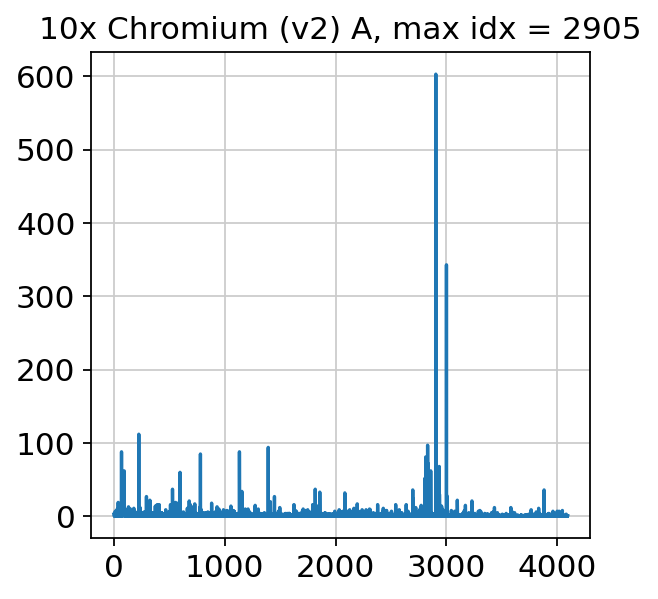

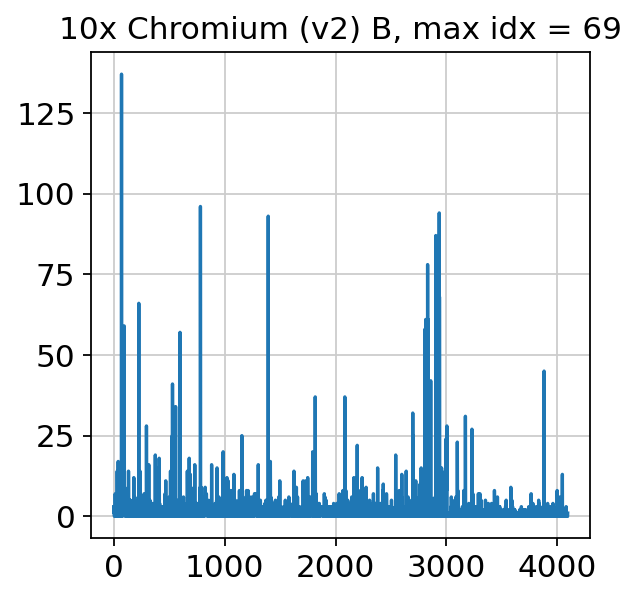

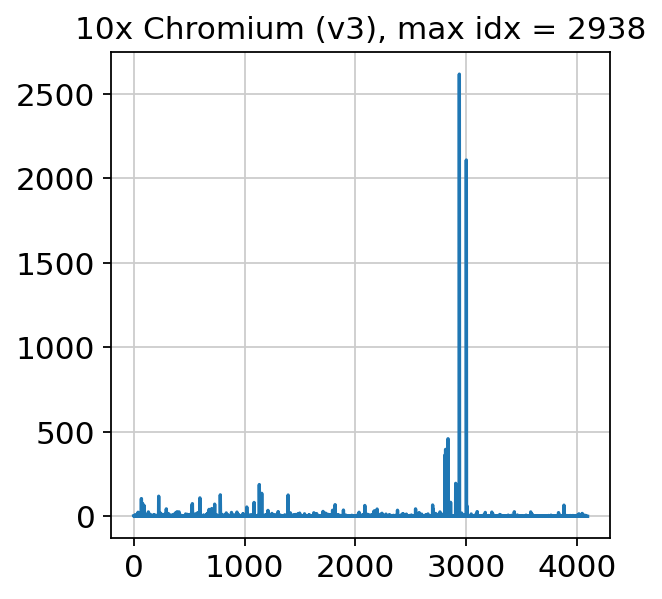

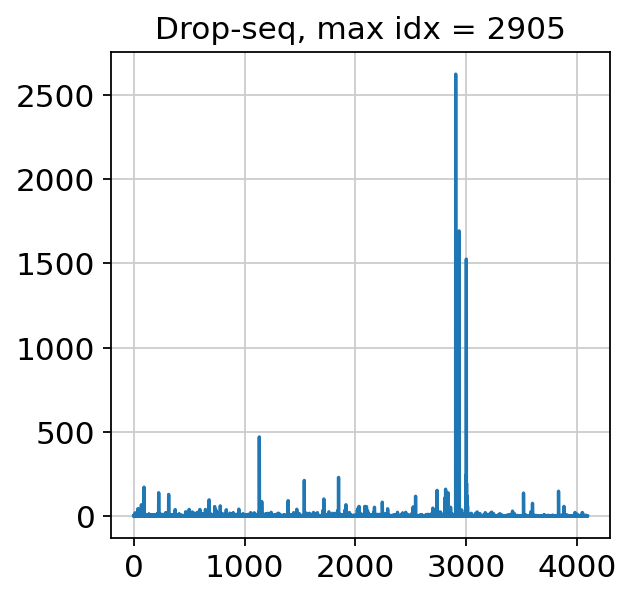

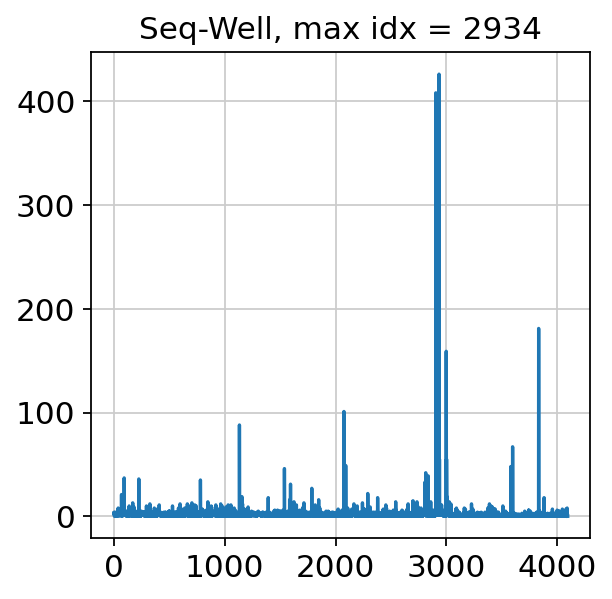

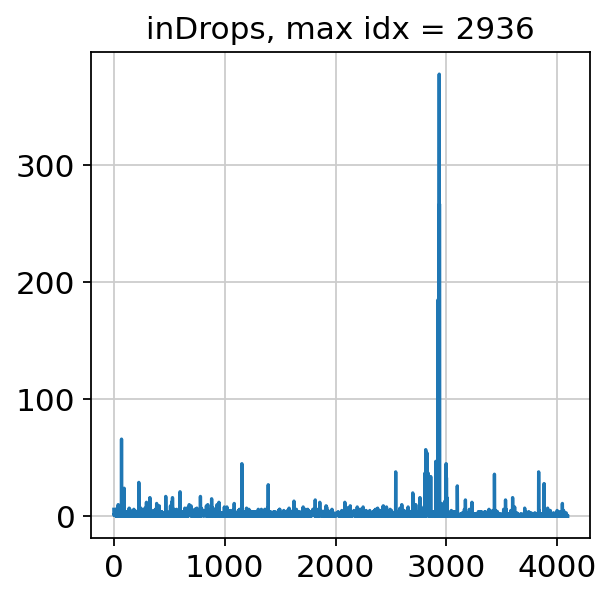

In [19]:
original_methods = ['10x Chromium (v2) A', '10x Chromium (v2) B', '10x Chromium (v3)',
                    'Drop-seq', 'Seq-Well', 'inDrops']

for method in original_methods:
    _adata = original_adata[original_adata.obs.Method == method].copy()
    X_g = np.array(_adata.X.max(axis=0).todense()).squeeze()
    max_idx = np.argmax(X_g)
    plt.plot(X_g)
    plt.title(f'{method}, max idx = {max_idx}')
    plt.show()

In [20]:
'MALAT1' in original_adata.var.gene_symbols.values

False

In [21]:
print(original_adata.var.gene_symbols.values[69])
print(original_adata.var.gene_symbols.values[2905])
print(original_adata.var.gene_symbols.values[2934])
print(original_adata.var.gene_symbols.values[2936])
print(original_adata.var.gene_symbols.values[2938])

CD74
IGKC
IGLV3-1
IGLC2
IGLC3
